In [1]:
#Imports
from qutip import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/neill/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape', 'info', 'squeeze', 'identity']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#import heom_fermions_1 as heom_fermions

import heom_fermions_old as heom_fermions
from heom_fmotd import FermionicHEOMSolver #c version
from heom_fmotd_py import FermionicHEOMSolver as FermionicHEOMSolverPy #python version
import time
from scipy.integrate import quad

In [4]:
def deltafun(j,k):
    if j==k: 
        return 1.
    else:
        return 0.

In [5]:

from scipy.integrate import quad
import scipy as scipy

options = Options(nsteps=15000, store_states=True, rtol=1e-14, atol=1e-14)


In [6]:

from qutip.states import enr_state_dictionaries

def get_aux_matrices(full, level, N_baths, Nk, N_cut, shape, dims):
    """
    Extracts the auxiliary matrices at a particular level
    from the full hierarchy ADOs.
    
    Parameters
    ----------
    full: ndarray
        A 2D array of the time evolution of the ADOs.
    
    level: int
        The level of the hierarchy to get the ADOs.
        
    N_cut: int
        The hierarchy cutoff.
    
    k: int
        The total number of exponentials used in each bath (assumed equal).
    
    N_baths: int
        The number of baths.
        
    shape : int
        the size of the ''system'' hilbert space
        
    dims : list
        the dimensions of the system hilbert space
    """
    #Note: Max N_cut is Nk*N_baths
    nstates, state2idx, idx2state = enr_state_dictionaries([2]*(Nk*N_baths) ,N_cut)#_heom_state_dictionaries([Nc + 1]*(Nk), Nc)
    aux_indices = []
    
    aux_heom_indices = []
    for stateid in state2idx:
        if np.sum(stateid) == level:
            aux_indices.append(state2idx[stateid])
            aux_heom_indices.append(stateid)
    full = np.array(full)
    aux = []

    for i in aux_indices:
        qlist = [Qobj(full[k, i, :].reshape(shape, shape).T,dims=dims) for k in range(len(full))]
        aux.append(qlist)
    return aux, aux_heom_indices, idx2state

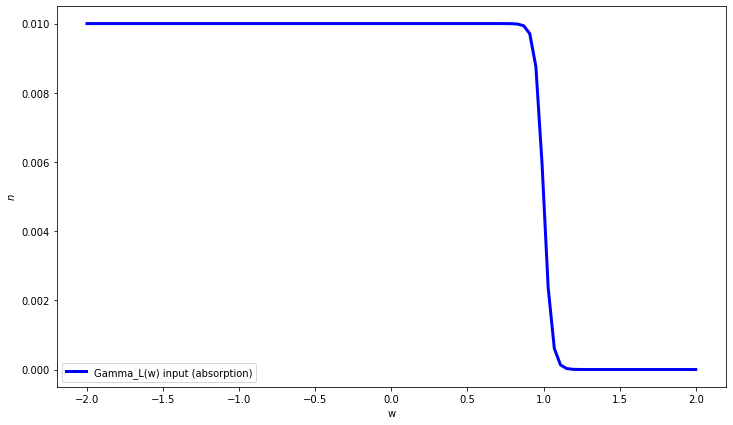

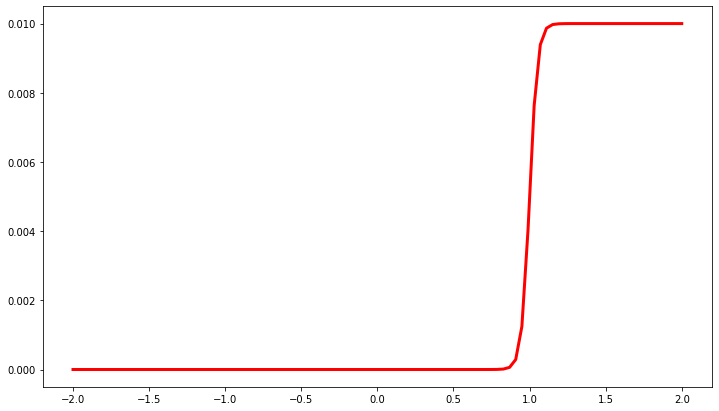

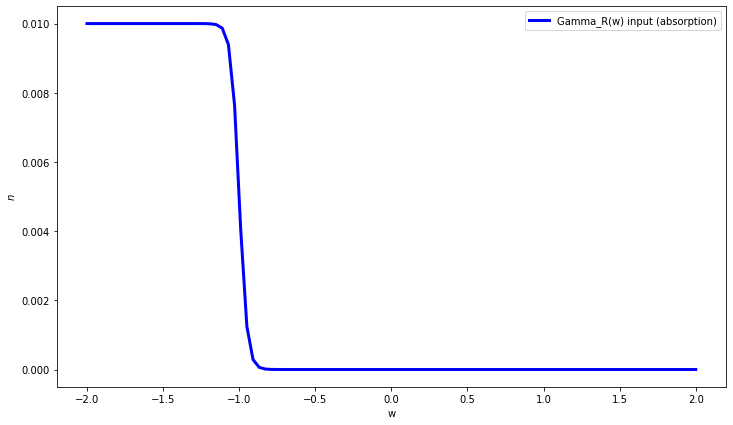

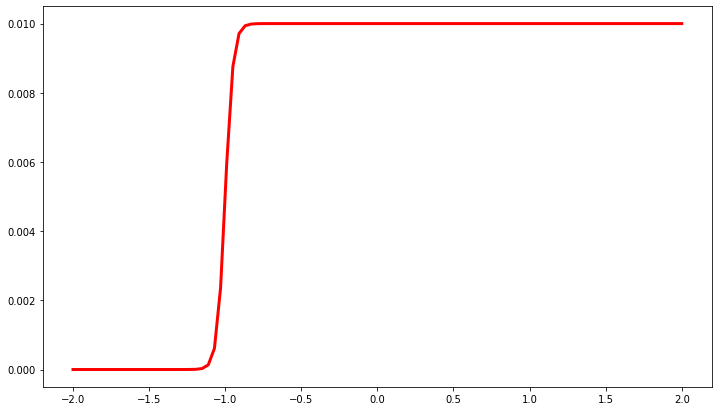

In [7]:
#parameters and spectra check

#thoss
Gamma = 0.01
#phillip
#Gamma =10

W = 10**4
#phillip
#W=0.1
#pade paper
#Gamma = 1.
#W=1.
 
#T = 300
T = 0.025851991 #in ev
beta = 1./T

theta = 2.
mu_l = theta/2.
mu_r = -theta/2.

w_list = np.linspace(-2,2,100)

def Gamma_L_w(w):
    return Gamma*W**2/((w-mu_l)**2 + W**2)

def Gamma_R_w(w):
    return Gamma*W**2/((w-mu_r)**2 + W**2)


def f(x):
    kB=1.
    return 1/(exp(x)+1.)
def f2(x):
    return 0.5

fig, ax1 = plt.subplots(figsize=(12, 7))
gam_list_in = [Gamma_L_w(w)*f(beta*(w-mu_l)) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_in, color="b", linewidth=3, label= r"Gamma_L(w) input (absorption)")

#ax1.set_ylim(0, 0.1)
ax1.set_xlabel("w")
ax1.set_ylabel(r"$n$")
ax1.legend()
fig, ax2 = plt.subplots(figsize=(12, 7))
#ax2.plot(E_list,[f_L(E) for E in E_list], color="r", linewidth=3, label= r"fl")
gam_list_out = [Gamma_L_w(w)*f(-beta*(w-mu_l)) for w in w_list]
spec = [Gamma_L_w(w) for w in w_list]
#print(gam_list)
ax2.plot(w_list,gam_list_out, color="r", linewidth=3, label= r"Gamma_L(w) output (emission)")
#ax2.plot(w_list,spec, color="g", linewidth=3, label= r"Gamma_L(w) output (emission)")

fig, ax1 = plt.subplots(figsize=(12, 7))
gam_list_in = [Gamma_R_w(w)*f(beta*(w-mu_r)) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_in, color="b", linewidth=3, label= r"Gamma_R(w) input (absorption)")

#ax1.set_ylim(0, 0.1)
ax1.set_xlabel("w")
ax1.set_ylabel(r"$n$")
ax1.legend()
fig, ax2 = plt.subplots(figsize=(12, 7))
#ax2.plot(E_list,[f_L(E) for E in E_list], color="r", linewidth=3, label= r"fl")
gam_list_out = [Gamma_R_w(w)*f(-beta*(w-mu_r)) for w in w_list]
spec = [Gamma_R_w(w) for w in w_list]
#print(gam_list)
ax2.plot(w_list,gam_list_out, color="r", linewidth=3, label= r"Gamma_R(w) output (emission)")
#ax2.plot(w_list,spec, color="g", linewidth=3, label= r"Gamma_L(w) output (emission)")


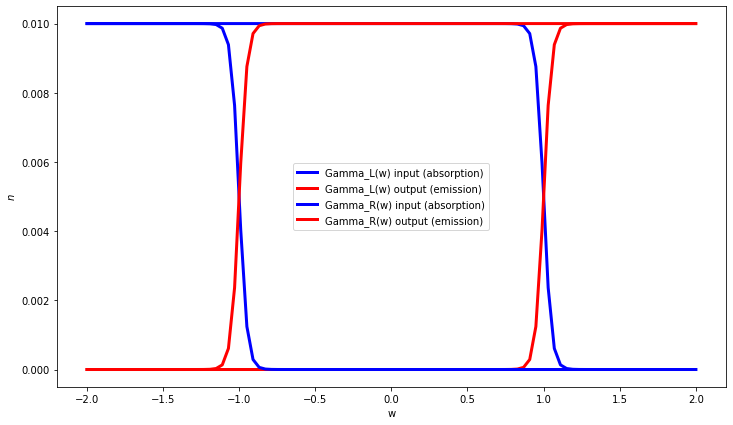

In [8]:

fig, ax1 = plt.subplots(figsize=(12, 7))
gam_list_in = [Gamma_L_w(w)*f(beta*(w-mu_l)) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_in, color="b", linewidth=3, label= r"Gamma_L(w) input (absorption)")

#ax1.set_ylim(0, 0.1)
ax1.set_xlabel("w")
ax1.set_ylabel(r"$n$")
ax1.legend()

#ax2.plot(E_list,[f_L(E) for E in E_list], color="r", linewidth=3, label= r"fl")
gam_list_out = [Gamma_L_w(w)*f(-beta*(w-mu_l)) for w in w_list]
spec = [Gamma_L_w(w) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_out, color="r", linewidth=3, label= r"Gamma_L(w) output (emission)")
#ax2.plot(w_list,spec, color="g", linewidth=3, label= r"Gamma_L(w) output (emission)")

gam_list_in = [Gamma_R_w(w)*f(beta*(w-mu_r)) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_in, color="b", linewidth=3, label= r"Gamma_R(w) input (absorption)")



#ax2.plot(E_list,[f_L(E) for E in E_list], color="r", linewidth=3, label= r"fl")
gam_list_out = [Gamma_R_w(w)*f(-beta*(w-mu_r)) for w in w_list]
spec = [Gamma_R_w(w) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_out, color="r", linewidth=3, label= r"Gamma_R(w) output (emission)")
#ax2.plot(w_list,spec, color="g", linewidth=3, label= r"Gamma_L(w) output (emission)")
#ax1.set_ylim(0, 0.1)
ax1.set_xlabel("w")
ax1.set_ylabel(r"$n$")
ax1.legend()

In [10]:
#Try integrable 2-bath model
#here I use paramaers from phillips paper
#this collates pade parameters

rhoHssPlistl13n2N11 = []
fullssPlistl13n2N11 = []


#theta_list = np.linspace(0,2,50)
theta_list = np.linspace(1,1,1)
for theta in theta_list:
    print("------------- theta:",theta)
    mu_l = theta/2.
    mu_r = -theta/2.


    tlist = np.linspace(0,0.001,100)



    lmax = 12



    #beta = 1./T
    #beta = np.inf

    w_list = np.linspace(-2,2,100)

    def Gamma_L_w(w):
        return Gamma*W**2/((w-mu_l)**2 + W**2)

    def Gamma_w(w, mu):
        return Gamma*W**2/((w-mu)**2 + W**2)


    def f(x):
        kB=1.
        return 1/(exp(x)+1.)





    #Next compare pade decomp to numerical integration

    Alpha =np.zeros((2*lmax,2*lmax))
    for j in range(2*lmax):
        for k in range(2*lmax):
            Alpha[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+1)-1)*(2*(k+1)-1))

    eigvalsA=eigvalsh(Alpha)  

    eps = []
    for val in  eigvalsA[0:lmax]:
        #print(-2/val)
        eps.append(-2/val)


    AlphaP =np.zeros((2*lmax-1,2*lmax-1))
    for j in range(2*lmax-1):
        for k in range(2*lmax-1):
            AlphaP[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+1)+1)*(2*(k+1)+1))
            #AlphaP[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+2)-1)*(2*(k+2)-1))

    eigvalsAP=eigvalsh(AlphaP)    


    chi = []
    for val in  eigvalsAP[0:lmax-1]:
        #print(-2/val)
        chi.append(-2/val)


    eta_list=[0.5*lmax*(2*(lmax + 1) - 1)*( 
      np.prod([chi[k]**2 - eps[j]**2 for k in range(lmax - 1)])/
        np.prod([eps[k]**2 - eps[j]**2 +deltafun(j,k) for k in range(lmax)])) 
              for j in range(lmax)]


    #kappa = [0,1,1,1.56,14.44]
    kappa = [0]+eta_list
    print(kappa)
    #epsilon = [0,1*pi,1*3*pi,1.06*5*pi,2.11*7*pi]
    #print([0,1*pi,1*3*pi,1.06*5*pi,2.11*7*pi])
    epsilon = [0]+eps
    print(epsilon)
    def f_approx(x):
        f = 0.5
        for l in range(1,lmax+1):
            f= f - 2*kappa[l]*x/(x**2+epsilon[l]**2)
        return f

    def f(x):
        kB=1.
        return 1/(exp(x)+1.)



    #######

    #####HERE I SET LMAX 0, and comment out hte pade stuff... lets just try with one exponent!!!!

    #now lets try switching it on. urgh.

    #lmax =2

    def C(tlist,sigma,mu):
        eta_list = []
        gamma_list  =[]

        #l = 0
        eta_0 = 0.5*Gamma*W*f_approx(1.0j*beta*W)
        #eta_0 = 0.5*Gamma*W*f(1.0j*beta*W)
        gamma_0 = W - sigma*1.0j*mu
        eta_list.append(eta_0)
        gamma_list.append(gamma_0)
        if lmax>0:
            for l in range(1,lmax+1):
                eta_list.append(-1.0j*(kappa[l]/beta)*Gamma*W**2/(-(epsilon[l]**2/beta**2)+W**2))
                gamma_list.append(epsilon[l]/beta - sigma*1.0j*mu)
        c_tot = []
        for t in tlist:
            c_tot.append(sum([eta_list[l]*exp(-gamma_list[l]*t) for l in range(lmax+1)]))
        return c_tot, eta_list, gamma_list


    #sigma = -  is dsetroy in environment create electron in system


    def c_t_L_num(t,sigma,mu):

        integrand = lambda w: (1/(2*pi))*exp(sigma*1.0j*w*t)*Gamma_w(w,mu)*f(sigma*beta*(w-mu))
        def real_func(x):
            return scipy.real(integrand(x))
        def imag_func(x):
            return scipy.imag(integrand(x))
        #return quad(integrand,-np.inf,np.inf)[0]
        #a= -600000
        #b = 600000

        a= -10**6
        b=10**6
        real_integral = quad(real_func, a, b)
        imag_integral = quad(imag_func, a, b)
        return real_integral[0] + 1.0j * imag_integral[0]


    #tlist = np.linspace(0,1e-3,100)


    cppL,etapL,gampL = C(tlist,1.0,mu_l)

    cpmL,etamL,gammL = C(tlist,-1.0,mu_l)

    #mu_r = -mu_l

    cppR,etapR,gampR = C(tlist,1.0,mu_r)

    cpmR,etamR,gammR = C(tlist,-1.0,mu_r)

    #heom simu on above params (Pade)

    #try and do thos proper model

    Nbos = 11

    d1 = tensor(destroy(2), qeye(Nbos))

    a = tensor(qeye(2), destroy(Nbos))

    e1 = 0.3 #d1 = spin up
    Omega = 0.2
    Lambda = 0.12

    H0 = e1*d1.dag()*d1 + Omega * a.dag()*a + Lambda * (a+a.dag())*d1.dag()*d1

    #Qops = [d1,d1.dag()]
    Qops = [d1.dag(),d1,d1.dag(),d1]


    rho_0 = tensor(basis(2,0)*basis(2,0).dag(),basis(Nbos,0)*basis(Nbos,0).dag())

    Kk=lmax+1
    Ncc=2*2
    Ncc=2*4
    Ncc = 4*Kk
    Ncc = 2
    tlist = np.linspace(0,100,1000)


    eta_list = [etapR,etamR,etapL,etamL]
    #T=0:
    #eta_list = [[Gamma*W/2.],[0.]]
    #eta_list = [[0.],[Gamma*W/2.]]
 
    gamma_list = [gampR,gammR,gampL,gammL]
    
    import time
  
    start = time.time()
    
    resultHEOM2=FermionicHEOMSolver(H0, Qops,  eta_list, gamma_list,  Ncc, options=options)
    end = time.time()
    print("construct time new code:", end - start)


   
    start = time.time()

    rhossHP2,fullssP2=resultHEOM2.steady_state()
    end = time.time()
    print("ss time new",end - start)
    
    rhoHssPlistl13n2N11.append(rhossHP2)
    fullssPlistl13n2N11.append(fullssP2)
    



------------- theta: 1.0
[0, 0.9999999999999817, 0.9999999999999816, 0.9999999999999805, 1.0000000000046934, 1.0000001305996948, 1.0001728625482167, 1.020256147853013, 1.296817401742517, 2.258443890216386, 4.669920118206144, 13.334983395803198, 121.41940605302618]
[0, 3.141592653589793, 9.424777960769381, 15.707963267948962, 21.991148575130925, 28.274333974674605, 34.55769183112516, 40.87155395505231, 47.89221477169843, 58.607509531671184, 79.12862969949285, 128.90837360256666, 382.49128623928533]
construct time new code: 48.74964618682861
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (667436, 667436)
Input matrix NNZ:   4498376

Analysis and Factorization Stage
--------------------------------
Factorization time:        52.9505
Factorization memory (Mb): 508.916
NNZ in LU factors:         137658460

Solution Stage
--------------
Solution time:                   1.3033
Solution memory (Mb):            22

In [32]:



rhoHssPlistl4n2N34 = []
fullssPlistl4n2N34 = []

theta_list = np.linspace(0,2,30)
#theta_list = np.linspace(1,1,1)

#theta_list = np.linspace(0.08163265306122448,0.08163265306122448,1)
for theta in theta_list:
    print("------------- theta:",theta)
    mu_l = theta/2.
    mu_r = -theta/2.


    tlist = np.linspace(0,0.001,100)



    lmax = 4



    #beta = 1./T
    #beta = np.inf

    w_list = np.linspace(-2,2,100)

    def Gamma_L_w(w):
        return Gamma*W**2/((w-mu_l)**2 + W**2)

    def Gamma_w(w, mu):
        return Gamma*W**2/((w-mu)**2 + W**2)


    def f(x):
        kB=1.
        return 1/(exp(x)+1.)





    #Next compare pade decomp to numerical integration

    Alpha =np.zeros((2*lmax,2*lmax))
    for j in range(2*lmax):
        for k in range(2*lmax):
            Alpha[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+1)-1)*(2*(k+1)-1))

    eigvalsA=eigvalsh(Alpha)  

    eps = []
    for val in  eigvalsA[0:lmax]:
        #print(-2/val)
        eps.append(-2/val)


    AlphaP =np.zeros((2*lmax-1,2*lmax-1))
    for j in range(2*lmax-1):
        for k in range(2*lmax-1):
            AlphaP[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+1)+1)*(2*(k+1)+1))
            #AlphaP[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+2)-1)*(2*(k+2)-1))

    eigvalsAP=eigvalsh(AlphaP)    


    chi = []
    for val in  eigvalsAP[0:lmax-1]:
        #print(-2/val)
        chi.append(-2/val)


    eta_list=[0.5*lmax*(2*(lmax + 1) - 1)*( 
      np.prod([chi[k]**2 - eps[j]**2 for k in range(lmax - 1)])/
        np.prod([eps[k]**2 - eps[j]**2 +deltafun(j,k) for k in range(lmax)])) 
              for j in range(lmax)]


    #kappa = [0,1,1,1.56,14.44]
    kappa = [0]+eta_list
    print(kappa)
    #epsilon = [0,1*pi,1*3*pi,1.06*5*pi,2.11*7*pi]
    #print([0,1*pi,1*3*pi,1.06*5*pi,2.11*7*pi])
    epsilon = [0]+eps
    print(epsilon)
    def f_approx(x):
        f = 0.5
        for l in range(1,lmax+1):
            f= f - 2*kappa[l]*x/(x**2+epsilon[l]**2)
        return f

    def f(x):
        kB=1.
        return 1/(exp(x)+1.)




    def C(tlist,sigma,mu):
        eta_list = []
        gamma_list  =[]

        #l = 0
        eta_0 = 0.5*Gamma*W*f_approx(1.0j*beta*W)
        #eta_0 = 0.5*Gamma*W*f(1.0j*beta*W)
        gamma_0 = W - sigma*1.0j*mu
        eta_list.append(eta_0)
        gamma_list.append(gamma_0)
        if lmax>0:
            for l in range(1,lmax+1):
                eta_list.append(-1.0j*(kappa[l]/beta)*Gamma*W**2/(-(epsilon[l]**2/beta**2)+W**2))
                gamma_list.append(epsilon[l]/beta - sigma*1.0j*mu)
        c_tot = []
        for t in tlist:
            c_tot.append(sum([eta_list[l]*exp(-gamma_list[l]*t) for l in range(lmax+1)]))
        return c_tot, eta_list, gamma_list


    #sigma = -  is dsetroy in environment create electron in system


    def c_t_L_num(t,sigma,mu):

        integrand = lambda w: (1/(2*pi))*exp(sigma*1.0j*w*t)*Gamma_w(w,mu)*f(sigma*beta*(w-mu))
        def real_func(x):
            return scipy.real(integrand(x))
        def imag_func(x):
            return scipy.imag(integrand(x))
        #return quad(integrand,-np.inf,np.inf)[0]
        #a= -600000
        #b = 600000

        a= -10**6
        b=10**6
        real_integral = quad(real_func, a, b)
        imag_integral = quad(imag_func, a, b)
        return real_integral[0] + 1.0j * imag_integral[0]


    #tlist = np.linspace(0,1e-3,100)


    cppL,etapL,gampL = C(tlist,1.0,mu_l)

    cpmL,etamL,gammL = C(tlist,-1.0,mu_l)

    #mu_r = -mu_l

    cppR,etapR,gampR = C(tlist,1.0,mu_r)

    cpmR,etamR,gammR = C(tlist,-1.0,mu_r)

    #heom simu on above params (Pade)

    #try and do thos proper model

    Nbos = 34

    d1 = tensor(destroy(2), qeye(Nbos))

    a = tensor(qeye(2), destroy(Nbos))

    e1 = 0.3 #d1 = spin up
    Omega = 0.2
    Lambda = 0.12

    H0 = e1*d1.dag()*d1 + Omega * a.dag()*a + Lambda * (a+a.dag())*d1.dag()*d1

    #Qops = [d1,d1.dag()]
    Qops = [d1.dag(),d1,d1.dag(),d1]


    rho_0 = tensor(basis(2,0)*basis(2,0).dag(),basis(Nbos,0)*basis(Nbos,0).dag())

    Kk=lmax+1
    Ncc=2*2
    Ncc=2*4
    Ncc = 4*Kk
    Ncc = 2
    tlist = np.linspace(0,100,1000)


    eta_list = [etapR,etamR,etapL,etamL]
    #T=0:
    #eta_list = [[Gamma*W/2.],[0.]]
    #eta_list = [[0.],[Gamma*W/2.]]
    print(eta_list)
    gamma_list = [gampR,gammR,gampL,gammL]
    print(gamma_list)
    
    import time
    #start = time.time()
    #resultHEOM1=heom_fermions.HSolverFermions(H0, [], Qops,  eta_list, gamma_list,  Ncc, Kk,renorm=False,bnd_cut_approx=False)
    #end = time.time()
    #print("construct time old code:", end - start)
    start = time.time()
    
    resultHEOM=FermionicHEOMSolver(H0, Qops,  eta_list, gamma_list,  Ncc, options=options)
    end = time.time()
    print("construct time new code:", end - start)
    #start = time.time()
    #out1P,full1P=resultHEOM1.run(rho_0,tlist)
    #end = time.time()
    #print(end - start)

    #start = time.time()

    #rhossHP,fullssP=resultHEOM1.ss(rho_0,H0)
    #end = time.time()
    #print("ss time old",end - start)
    start = time.time()

    #rhossHP,fullssP=resultHEOM.steady_state(max_iter_refine = 100000, weighted_matching = True)
    rhossHP,fullssP=resultHEOM.steady_state(use_mkl=False)
    end = time.time()
    print("ss time new",end - start)
    
   
    print("ss time",end - start)
    rhoHssPlistl4n2N34.append(rhossHP)
    fullssPlistl4n2N34.append(fullssP)
    #newrhoHssPlistl5n2N16.append(rhossHP)
    #newfullssPlistl5n2N16.append(fullssP)
    #Pg1 = expect(out1.states,sz)
    #Pgg1 = expect(out1.states,sm*sm.dag())
    #1mev = 1.51926741 × 10^12 hertz 


    #fig, ax1 = plt.subplots(figsize=(12, 7))

    #ax1.plot(tlist,expect(out1P.states,basis(2,1)*basis(2,1).dag()), color="black", linewidth=3, label= r"up")
    #ax1.plot(tlist,[f(1) for t in tlist], "r--", linewidth=3, label= r"up")
    #ax1.plot(tlist,[f(beta*(mu_l - mu_l)) for t in tlist], "r--", linewidth=3, label= r"up")
    #ax1.set_ylim(0, 1)
    #ax1.set_xlabel("t")
    #ax1.set_ylabel(r"pop")
    #ax1.legend()


------------- theta: 0.0
[0, 1.0000000002833282, 1.0029574779152577, 1.562046672956373, 14.434995848845045]
[0, 3.141592653643085, 9.426759654133647, 16.60631547022426, 46.31950868181982]
[[(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j], [(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j], [(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j], [(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j]]
[[(10000+0j), (0.08121642500764716+0j), (0.24370050573782617+0j), (0.42930631807939834+0j), (1.1974515215668278+0j)], [(10000+0j), (0.08121642500764716+0j), (0.24370050573782617+0j), (0.42930631807939834+0j), (1.1974515215668278+0j)], [(10000+0j), (0.08121642500764716+0j), (0.2437005057

construct time new code: 370.56779527664185
ss time new 4683.180974245071
ss time 4683.180974245071
------------- theta: 0.41379310344827586
[0, 1.0000000002833282, 1.0029574779152577, 1.562046672956373, 14.434995848845045]
[0, 3.141592653643085, 9.426759654133647, 16.60631547022426, 46.31950868181982]
[[(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j], [(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j], [(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j], [(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j]]
[[(10000+0.20689655172413793j), (0.08121642500764716+0.20689655172413793j), (0.24370050573782617+0.20689655172413793j), (0.42930631807939834+0.20689655172413793j), (1.1974

construct time new code: 374.8145716190338
ss time new 4658.7340178489685
ss time 4658.7340178489685
------------- theta: 0.7586206896551724
[0, 1.0000000002833282, 1.0029574779152577, 1.562046672956373, 14.434995848845045]
[0, 3.141592653643085, 9.426759654133647, 16.60631547022426, 46.31950868181982]
[[(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j], [(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j], [(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j], [(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j]]
[[(10000+0.3793103448275862j), (0.08121642500764716+0.3793103448275862j), (0.24370050573782617+0.3793103448275862j), (0.42930631807939834+0.3793103448275862j), (1.19745152

construct time new code: 371.0890700817108
ss time new 4759.650357723236
ss time 4759.650357723236
------------- theta: 1.103448275862069
[0, 1.0000000002833282, 1.0029574779152577, 1.562046672956373, 14.434995848845045]
[0, 3.141592653643085, 9.426759654133647, 16.60631547022426, 46.31950868181982]
[[(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j], [(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j], [(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j], [(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j]]
[[(10000+0.5517241379310345j), (0.08121642500764716+0.5517241379310345j), (0.24370050573782617+0.5517241379310345j), (0.42930631807939834+0.5517241379310345j), (1.19745152156

ss time new 4675.698273181915
ss time 4675.698273181915
------------- theta: 1.4482758620689655
[0, 1.0000000002833282, 1.0029574779152577, 1.562046672956373, 14.434995848845045]
[0, 3.141592653643085, 9.426759654133647, 16.60631547022426, 46.31950868181982]
[[(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j], [(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j], [(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j], [(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j]]
[[(10000+0.7241379310344828j), (0.08121642500764716+0.7241379310344828j), (0.24370050573782617+0.7241379310344828j), (0.42930631807939834+0.7241379310344828j), (1.1974515215668278+0.7241379310344828j)], [(10000-0.724

[[(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j], [(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j], [(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j], [(25+0.004653358434424263j), -0.00025851991009029823j, -0.0002592844770784683j, -0.0004038201660527373j, -0.0037317338812027593j]]
[[(10000+0.896551724137931j), (0.08121642500764716+0.896551724137931j), (0.24370050573782617+0.896551724137931j), (0.42930631807939834+0.896551724137931j), (1.1974515215668278+0.896551724137931j)], [(10000-0.896551724137931j), (0.08121642500764716-0.896551724137931j), (0.24370050573782617-0.896551724137931j), (0.42930631807939834-0.896551724137931j), (1.1974515215668278-0.896551724137931j)], [(10000-0.896551724137931j), (0.08121642500764716-0.896551724137931j), (0.243700

In [9]:
rhoHssPlistl5n2N34=qload('rhoHssPlistl5n2N34v2')
fullssPlistl5n2N34v2=qload('fullssPlistl5n2N34v2')

Loaded list object.
Loaded list object.


In [12]:
qsave( rhoHssPlistl5n2N34,'rhoHssPlistl5n2N34v3')
qsave( fullssPlistl5n2N34,'fullssPlistl5n2N34v3')

In [33]:
qsave( rhoHssPlistl4n2N34,'rhoHssPlistl4n2N34v3')
qsave( fullssPlistl4n2N34,'fullssPlistl4n2N34v3') 
    
    

In [18]:
[f for f in theta_list[27:30]]

[1.8620689655172413, 1.9310344827586206, 2.0]

In [33]:
theta_list[12]

0.8275862068965517

In [35]:

theta_list2 = np.linspace(1.183673469387755,2,21)

In [14]:
print(len(rhoHssPlistl5n2N34))

29


In [36]:
qsave(rhoHssPlistl5n2N34)
qsave(fullssPlistl5n2N34)

In [28]:


rhoHssPlistl6n2N16 = []
fullssPlistl6n2N16 = []

theta_list = np.linspace(0,2,30)
#theta_list = np.linspace(1,1,1)

#theta_list = np.linspace(0.08163265306122448,0.08163265306122448,1)
for theta in theta_list:
    print("------------- theta:",theta)
    mu_l = theta/2.
    mu_r = -theta/2.


    tlist = np.linspace(0,0.001,100)



    lmax = 6



    #beta = 1./T
    #beta = np.inf

    w_list = np.linspace(-2,2,100)

    def Gamma_L_w(w):
        return Gamma*W**2/((w-mu_l)**2 + W**2)

    def Gamma_w(w, mu):
        return Gamma*W**2/((w-mu)**2 + W**2)


    def f(x):
        kB=1.
        return 1/(exp(x)+1.)





    #Next compare pade decomp to numerical integration

    Alpha =np.zeros((2*lmax,2*lmax))
    for j in range(2*lmax):
        for k in range(2*lmax):
            Alpha[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+1)-1)*(2*(k+1)-1))

    eigvalsA=eigvalsh(Alpha)  

    eps = []
    for val in  eigvalsA[0:lmax]:
        #print(-2/val)
        eps.append(-2/val)


    AlphaP =np.zeros((2*lmax-1,2*lmax-1))
    for j in range(2*lmax-1):
        for k in range(2*lmax-1):
            AlphaP[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+1)+1)*(2*(k+1)+1))
            #AlphaP[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+2)-1)*(2*(k+2)-1))

    eigvalsAP=eigvalsh(AlphaP)    


    chi = []
    for val in  eigvalsAP[0:lmax-1]:
        #print(-2/val)
        chi.append(-2/val)


    eta_list=[0.5*lmax*(2*(lmax + 1) - 1)*( 
      np.prod([chi[k]**2 - eps[j]**2 for k in range(lmax - 1)])/
        np.prod([eps[k]**2 - eps[j]**2 +deltafun(j,k) for k in range(lmax)])) 
              for j in range(lmax)]


    #kappa = [0,1,1,1.56,14.44]
    kappa = [0]+eta_list
    print(kappa)
    #epsilon = [0,1*pi,1*3*pi,1.06*5*pi,2.11*7*pi]
    #print([0,1*pi,1*3*pi,1.06*5*pi,2.11*7*pi])
    epsilon = [0]+eps
    print(epsilon)
    def f_approx(x):
        f = 0.5
        for l in range(1,lmax+1):
            f= f - 2*kappa[l]*x/(x**2+epsilon[l]**2)
        return f

    def f(x):
        kB=1.
        return 1/(exp(x)+1.)



    def C(tlist,sigma,mu):
        eta_list = []
        gamma_list  =[]

        #l = 0
        eta_0 = 0.5*Gamma*W*f_approx(1.0j*beta*W)
        #eta_0 = 0.5*Gamma*W*f(1.0j*beta*W)
        gamma_0 = W - sigma*1.0j*mu
        eta_list.append(eta_0)
        gamma_list.append(gamma_0)
        if lmax>0:
            for l in range(1,lmax+1):
                eta_list.append(-1.0j*(kappa[l]/beta)*Gamma*W**2/(-(epsilon[l]**2/beta**2)+W**2))
                gamma_list.append(epsilon[l]/beta - sigma*1.0j*mu)
        c_tot = []
        for t in tlist:
            c_tot.append(sum([eta_list[l]*exp(-gamma_list[l]*t) for l in range(lmax+1)]))
        return c_tot, eta_list, gamma_list


    #sigma = -  is dsetroy in environment create electron in system


    def c_t_L_num(t,sigma,mu):

        integrand = lambda w: (1/(2*pi))*exp(sigma*1.0j*w*t)*Gamma_w(w,mu)*f(sigma*beta*(w-mu))
        def real_func(x):
            return scipy.real(integrand(x))
        def imag_func(x):
            return scipy.imag(integrand(x))
        #return quad(integrand,-np.inf,np.inf)[0]
        #a= -600000
        #b = 600000

        a= -10**6
        b=10**6
        real_integral = quad(real_func, a, b)
        imag_integral = quad(imag_func, a, b)
        return real_integral[0] + 1.0j * imag_integral[0]


    #tlist = np.linspace(0,1e-3,100)


    cppL,etapL,gampL = C(tlist,1.0,mu_l)

    cpmL,etamL,gammL = C(tlist,-1.0,mu_l)

    #mu_r = -mu_l

    cppR,etapR,gampR = C(tlist,1.0,mu_r)

    cpmR,etamR,gammR = C(tlist,-1.0,mu_r)

    #heom simu on above params (Pade)

    #try and do thos proper model

    Nbos = 16

    d1 = tensor(destroy(2), qeye(Nbos))

    a = tensor(qeye(2), destroy(Nbos))

    e1 = 0.3 #d1 = spin up
    Omega = 0.2
    Lambda = 0.12

    H0 = e1*d1.dag()*d1 + Omega * a.dag()*a + Lambda * (a+a.dag())*d1.dag()*d1

    #Qops = [d1,d1.dag()]
    Qops = [d1.dag(),d1,d1.dag(),d1]


    rho_0 = tensor(basis(2,0)*basis(2,0).dag(),basis(Nbos,0)*basis(Nbos,0).dag())

    Kk=lmax+1
    Ncc=2*2
    Ncc=2*4
    Ncc = 4*Kk
    Ncc = 2
    tlist = np.linspace(0,100,1000)


    eta_list = [etapR,etamR,etapL,etamL]
    #T=0:
    #eta_list = [[Gamma*W/2.],[0.]]
    #eta_list = [[0.],[Gamma*W/2.]]
    print(eta_list)
    gamma_list = [gampR,gammR,gampL,gammL]
    print(gamma_list)
    
    import time
    #start = time.time()
    #resultHEOM1=heom_fermions.HSolverFermions(H0, [], Qops,  eta_list, gamma_list,  Ncc, Kk,renorm=False,bnd_cut_approx=False)
    #end = time.time()
    #print("construct time old code:", end - start)
    start = time.time()
    
    resultHEOM=FermionicHEOMSolver(H0, Qops,  eta_list, gamma_list,  Ncc, options=options)
    end = time.time()
    print("construct time new code:", end - start)
    #start = time.time()
    #out1P,full1P=resultHEOM1.run(rho_0,tlist)
    #end = time.time()
    #print(end - start)

    #start = time.time()

    #rhossHP,fullssP=resultHEOM1.ss(rho_0,H0)
    #end = time.time()
    #print("ss time old",end - start)
    start = time.time()

    rhossHP,fullssP=resultHEOM.steady_state()
    end = time.time()
    print("ss time new",end - start)
    
   
    print("ss time",end - start)
    rhoHssPlistl6n2N16.append(rhossHP)
    fullssPlistl6n2N16.append(fullssP)
    #newrhoHssPlistl5n2N16.append(rhossHP)
    #newfullssPlistl5n2N16.append(fullssP)
    #Pg1 = expect(out1.states,sz)
    #Pgg1 = expect(out1.states,sm*sm.dag())
    #1mev = 1.51926741 × 10^12 hertz 


    #fig, ax1 = plt.subplots(figsize=(12, 7))

    #ax1.plot(tlist,expect(out1P.states,basis(2,1)*basis(2,1).dag()), color="black", linewidth=3, label= r"up")
    #ax1.plot(tlist,[f(1) for t in tlist], "r--", linewidth=3, label= r"up")
    #ax1.plot(tlist,[f(beta*(mu_l - mu_l)) for t in tlist], "r--", linewidth=3, label= r"up")
    #ax1.set_ylim(0, 1)
    #ax1.set_xlabel("t")
    #ax1.set_ylabel(r"pop")
    #ax1.legend()


------------- theta: 0.0
[0, 0.9999999999999942, 1.00000005346681, 1.0016715804819762, 1.2163490959599543, 3.3329458292202263, 31.449033440871034]
[0, 3.141592653589793, 9.424777982548235, 15.70932153007796, 22.346398974559364, 34.688398296763275, 99.81920982014528]
[[(25+0.010082277039975336j), -0.0002585199100170507j, -0.0002585199239757052j, -0.000258952047262851j, -0.00031445045986558325j, -0.0008616328627340188j, -0.008130201836120126j], [(25+0.010082277039975336j), -0.0002585199100170507j, -0.0002585199239757052j, -0.000258952047262851j, -0.00031445045986558325j, -0.0008616328627340188j, -0.008130201836120126j], [(25+0.010082277039975336j), -0.0002585199100170507j, -0.0002585199239757052j, -0.000258952047262851j, -0.00031445045986558325j, -0.0008616328627340188j, -0.008130201836120126j], [(25+0.010082277039975336j), -0.0002585199100170507j, -0.0002585199239757052j, -0.000258952047262851j, -0.00031445045986558325j, -0.0008616328627340188j, -0.008130201836120126j]]
[[(10000+0j), (0

construct time new code: 44.84652757644653
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (416768, 416768)
Input matrix NNZ:   2803812

Analysis and Factorization Stage
--------------------------------
Factorization time:        51.8967
Factorization memory (Mb): 326.1855
NNZ in LU factors:         219659148

Solution Stage
--------------
Solution time:                   1.6975
Solution memory (Mb):            3485.9072
Number of iterative refinements: 4
Total memory (Mb):               3812.0928

ss time new 54.25191521644592
ss time 54.25191521644592
------------- theta: 0.27586206896551724
[0, 0.9999999999999942, 1.00000005346681, 1.0016715804819762, 1.2163490959599543, 3.3329458292202263, 31.449033440871034]
[0, 3.141592653589793, 9.424777982548235, 15.70932153007796, 22.346398974559364, 34.688398296763275, 99.81920982014528]
[[(25+0.010082277039975336j), -0.0002585199100170507j, -0.000258519923975705

construct time new code: 44.55688452720642
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (416768, 416768)
Input matrix NNZ:   2803812

Analysis and Factorization Stage
--------------------------------
Factorization time:        49.0035
Factorization memory (Mb): 341.7158
NNZ in LU factors:         210234078

Solution Stage
--------------
Solution time:                   1.9535
Solution memory (Mb):            3342.0928
Number of iterative refinements: 5
Total memory (Mb):               3683.8086

ss time new 51.58906865119934
ss time 51.58906865119934
------------- theta: 0.48275862068965514
[0, 0.9999999999999942, 1.00000005346681, 1.0016715804819762, 1.2163490959599543, 3.3329458292202263, 31.449033440871034]
[0, 3.141592653589793, 9.424777982548235, 15.70932153007796, 22.346398974559364, 34.688398296763275, 99.81920982014528]
[[(25+0.010082277039975336j), -0.0002585199100170507j, -0.000258519923975705

construct time new code: 45.07646417617798
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (416768, 416768)
Input matrix NNZ:   2803812

Analysis and Factorization Stage
--------------------------------
Factorization time:        45.5132
Factorization memory (Mb): 333.8799
NNZ in LU factors:         210892542

Solution Stage
--------------
Solution time:                   1.9145
Solution memory (Mb):            3352.1396
Number of iterative refinements: 5
Total memory (Mb):               3686.0195

ss time new 48.052724838256836
ss time 48.052724838256836
------------- theta: 0.6896551724137931
[0, 0.9999999999999942, 1.00000005346681, 1.0016715804819762, 1.2163490959599543, 3.3329458292202263, 31.449033440871034]
[0, 3.141592653589793, 9.424777982548235, 15.70932153007796, 22.346398974559364, 34.688398296763275, 99.81920982014528]
[[(25+0.010082277039975336j), -0.0002585199100170507j, -0.00025851992397570

construct time new code: 44.91351532936096
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (416768, 416768)
Input matrix NNZ:   2803812

Analysis and Factorization Stage
--------------------------------
Factorization time:        46.0822
Factorization memory (Mb): 324.0811
NNZ in LU factors:         214767986

Solution Stage
--------------
Solution time:                   2.3005
Solution memory (Mb):            3411.2744
Number of iterative refinements: 6
Total memory (Mb):               3735.3555

ss time new 49.016457080841064
ss time 49.016457080841064
------------- theta: 0.896551724137931
[0, 0.9999999999999942, 1.00000005346681, 1.0016715804819762, 1.2163490959599543, 3.3329458292202263, 31.449033440871034]
[0, 3.141592653589793, 9.424777982548235, 15.70932153007796, 22.346398974559364, 34.688398296763275, 99.81920982014528]
[[(25+0.010082277039975336j), -0.0002585199100170507j, -0.000258519923975705

construct time new code: 44.89948892593384
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (416768, 416768)
Input matrix NNZ:   2803812

Analysis and Factorization Stage
--------------------------------
Factorization time:        43.0914
Factorization memory (Mb): 308.8623
NNZ in LU factors:         218396416

Solution Stage
--------------
Solution time:                   2.9178
Solution memory (Mb):            3466.6396
Number of iterative refinements: 8
Total memory (Mb):               3775.502

ss time new 46.65963578224182
ss time 46.65963578224182
------------- theta: 1.103448275862069
[0, 0.9999999999999942, 1.00000005346681, 1.0016715804819762, 1.2163490959599543, 3.3329458292202263, 31.449033440871034]
[0, 3.141592653589793, 9.424777982548235, 15.70932153007796, 22.346398974559364, 34.688398296763275, 99.81920982014528]
[[(25+0.010082277039975336j), -0.0002585199100170507j, -0.0002585199239757052j,

construct time new code: 44.77080416679382
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (416768, 416768)
Input matrix NNZ:   2803812

Analysis and Factorization Stage
--------------------------------
Factorization time:        48.0325
Factorization memory (Mb): 336.2881
NNZ in LU factors:         211068812

Solution Stage
--------------
Solution time:                   1.6028
Solution memory (Mb):            3354.8291
Number of iterative refinements: 4
Total memory (Mb):               3691.1172

ss time new 50.27936816215515
ss time 50.27936816215515
------------- theta: 1.3103448275862069
[0, 0.9999999999999942, 1.00000005346681, 1.0016715804819762, 1.2163490959599543, 3.3329458292202263, 31.449033440871034]
[0, 3.141592653589793, 9.424777982548235, 15.70932153007796, 22.346398974559364, 34.688398296763275, 99.81920982014528]
[[(25+0.010082277039975336j), -0.0002585199100170507j, -0.0002585199239757052

construct time new code: 44.386157274246216
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (416768, 416768)
Input matrix NNZ:   2803812

Analysis and Factorization Stage
--------------------------------
Factorization time:        48.2357
Factorization memory (Mb): 322.1377
NNZ in LU factors:         216986106

Solution Stage
--------------
Solution time:                   1.6098
Solution memory (Mb):            3446.2344
Number of iterative refinements: 4
Total memory (Mb):               3768.3721

ss time new 50.46311855316162
ss time 50.46311855316162
------------- theta: 1.5172413793103448
[0, 0.9999999999999942, 1.00000005346681, 1.0016715804819762, 1.2163490959599543, 3.3329458292202263, 31.449033440871034]
[0, 3.141592653589793, 9.424777982548235, 15.70932153007796, 22.346398974559364, 34.688398296763275, 99.81920982014528]
[[(25+0.010082277039975336j), -0.0002585199100170507j, -0.000258519923975705

construct time new code: 44.835416078567505
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (416768, 416768)
Input matrix NNZ:   2803812

Analysis and Factorization Stage
--------------------------------
Factorization time:        47.131
Factorization memory (Mb): 325.2002
NNZ in LU factors:         213428564

Solution Stage
--------------
Solution time:                   3.2236
Solution memory (Mb):            3390.8369
Number of iterative refinements: 9
Total memory (Mb):               3716.0371

ss time new 50.983481884002686
ss time 50.983481884002686
------------- theta: 1.7241379310344827
[0, 0.9999999999999942, 1.00000005346681, 1.0016715804819762, 1.2163490959599543, 3.3329458292202263, 31.449033440871034]
[0, 3.141592653589793, 9.424777982548235, 15.70932153007796, 22.346398974559364, 34.688398296763275, 99.81920982014528]
[[(25+0.010082277039975336j), -0.0002585199100170507j, -0.00025851992397570

construct time new code: 45.382678270339966
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (416768, 416768)
Input matrix NNZ:   2803812

Analysis and Factorization Stage
--------------------------------
Factorization time:        52.4104
Factorization memory (Mb): 339.2568
NNZ in LU factors:         212814244

Solution Stage
--------------
Solution time:                   1.6331
Solution memory (Mb):            3381.4629
Number of iterative refinements: 4
Total memory (Mb):               3720.7197

ss time new 54.70403051376343
ss time 54.70403051376343
------------- theta: 1.9310344827586206
[0, 0.9999999999999942, 1.00000005346681, 1.0016715804819762, 1.2163490959599543, 3.3329458292202263, 31.449033440871034]
[0, 3.141592653589793, 9.424777982548235, 15.70932153007796, 22.346398974559364, 34.688398296763275, 99.81920982014528]
[[(25+0.010082277039975336j), -0.0002585199100170507j, -0.000258519923975705

In [29]:
#I need to generalize this a b it better

aux_1_list_list=[]
aux1_indices_list=[]
aux_2_list_list=[]
aux2_indices_list=[]

#for kk,lam in enumerate(lamlist):
K = Kk  #this is not kk (Ihope)


#aux_1_list, aux1_indices = get_aux_matrices([fullss], 1, 4, K)
#aux_2_list, aux2_indices = get_aux_matrices([fullss], 2, 4, K)

shape = H0.shape[0]
dims = H0.dims
aux_1_list, aux1_indices, idx2state = get_aux_matrices(fullssPlistl6n2N16, 1, 4, K, Ncc, shape, dims)
aux_2_list, aux2_indices, idx2state = get_aux_matrices(fullssPlistl6n2N16, 2, 4, K, Ncc, shape, dims)



d1 = tensor(destroy(2), qeye(Nbos))   #Kk to 2*Kk
#currP = [0.0]+[-1.0j * ((d1*(sum([aux_1_list[gg][t] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][t] for gg in range(Kk)]))).tr()) for t in range(999)]
#currP = [-1.0j * ((d1*(sum([aux_1_list[gg][thet] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][thet] for gg in range(Kk)]))).tr()) for thet, thet2 in enumerate(theta_list)]
#currPl5n2N16 = [1.0j * ((d1*(sum([aux_1_list[gg][thet] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][thet] for gg in range(Kk)]))).tr()) for thet, thet2 in enumerate(theta_list)]
currPl6n2N16 = [1.0j * (((sum([(d1*aux_1_list[gg][thet]).tr() for gg in range(Kk,2*Kk)])))  \
                      -  ((sum([(d1.dag()*aux_1_list[gg][thet]).tr() for gg in range(Kk)])))) \
                for thet, thet2 in enumerate(theta_list)]

In [30]:
currPunitsl6n2N16 = [curr*2.434e-4*1e6 for curr in currPl6n2N16]

In [34]:
#I need to generalize this a b it better

aux_1_list_list=[]
aux1_indices_list=[]
aux_2_list_list=[]
aux2_indices_list=[]

#for kk,lam in enumerate(lamlist):
K = Kk  #this is not kk (Ihope)


#aux_1_list, aux1_indices = get_aux_matrices([fullss], 1, 4, K)
#aux_2_list, aux2_indices = get_aux_matrices([fullss], 2, 4, K)

shape = H0.shape[0]
dims = H0.dims
aux_1_list, aux1_indices, idx2state = get_aux_matrices(fullssPlistl4n2N34, 1, 4, K, Ncc, shape, dims)
aux_2_list, aux2_indices, idx2state = get_aux_matrices(fullssPlistl4n2N34, 2, 4, K, Ncc, shape, dims)



d1 = tensor(destroy(2), qeye(Nbos))   #Kk to 2*Kk
#currP = [0.0]+[-1.0j * ((d1*(sum([aux_1_list[gg][t] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][t] for gg in range(Kk)]))).tr()) for t in range(999)]
#currP = [-1.0j * ((d1*(sum([aux_1_list[gg][thet] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][thet] for gg in range(Kk)]))).tr()) for thet, thet2 in enumerate(theta_list)]
#currPl5n2N16 = [1.0j * ((d1*(sum([aux_1_list[gg][thet] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][thet] for gg in range(Kk)]))).tr()) for thet, thet2 in enumerate(theta_list)]
currPl4n2N34 = [1.0j * (((sum([(d1*aux_1_list[gg][thet]).tr() for gg in range(Kk,2*Kk)])))  \
                      -  ((sum([(d1.dag()*aux_1_list[gg][thet]).tr() for gg in range(Kk)])))) \
                for thet, thet2 in enumerate(theta_list)]

In [37]:
currPunitsl4n2N34 = [curr*2.434e-4*1e6 for curr in currPl4n2N34]

In [13]:
#I need to generalize this a b it better

aux_1_list_list=[]
aux1_indices_list=[]
aux_2_list_list=[]
aux2_indices_list=[]

#for kk,lam in enumerate(lamlist):
K = Kk  #this is not kk (Ihope)


#aux_1_list, aux1_indices = get_aux_matrices([fullss], 1, 4, K)
#aux_2_list, aux2_indices = get_aux_matrices([fullss], 2, 4, K)

shape = H0.shape[0]
dims = H0.dims
aux_1_list, aux1_indices, idx2state = get_aux_matrices(fullssPlistl5n2N34, 1, 4, K, Ncc, shape, dims)
aux_2_list, aux2_indices, idx2state = get_aux_matrices(fullssPlistl5n2N34, 2, 4, K, Ncc, shape, dims)



d1 = tensor(destroy(2), qeye(Nbos))   #Kk to 2*Kk
#currP = [0.0]+[-1.0j * ((d1*(sum([aux_1_list[gg][t] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][t] for gg in range(Kk)]))).tr()) for t in range(999)]
#currP = [-1.0j * ((d1*(sum([aux_1_list[gg][thet] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][thet] for gg in range(Kk)]))).tr()) for thet, thet2 in enumerate(theta_list)]
#currPl5n2N16 = [1.0j * ((d1*(sum([aux_1_list[gg][thet] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][thet] for gg in range(Kk)]))).tr()) for thet, thet2 in enumerate(theta_list)]
currPl5n2N34 = [1.0j * (((sum([(d1*aux_1_list[gg][thet]).tr() for gg in range(Kk,2*Kk)])))  \
                      -  ((sum([(d1.dag()*aux_1_list[gg][thet]).tr() for gg in range(Kk)])))) \
                for thet, thet2 in enumerate(theta_list)]

In [14]:
currPunitsl5n2N34 = [curr*2.434e-4*1e6 for curr in currPl5n2N34]

In [15]:
qsave(currPunitsl5n2N34,'currPunitsl5n2N34v3')

In [16]:
currold = qload("currPunitsl5n2N34")

Loaded list object.


In [26]:
qsave(currPunitsl5n2N16,"currPunitsl5n2N16")
qsave(fullssPlistl5n2N16,"fullssPlistl5n2N16")
qsave(rhoHssPlistl5n2N16,"rhoHssPlistl5n2N16")

In [42]:
matplotlib.rcParams['figure.figsize'] = (7, 5)
matplotlib.rcParams['axes.titlesize'] = 25
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['lines.markersize'] = 5
matplotlib.rcParams['font.family'] = 'STIXGeneral' 
matplotlib.rcParams['mathtext.fontset'] =  'stix'

/home/neill/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


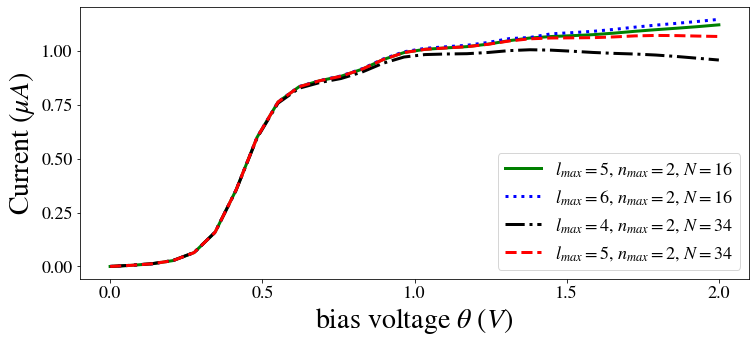

In [49]:


fig, ax1 = plt.subplots(figsize=(12, 5))



#ax1.plot(theta_list,currPunitsl5n2N8, color="red", linestyle='--', linewidth=3, label= r"l=5, n_max = 2, N_bos = 10")
#ax1.plot(theta_list,currPunitsl5n2N16, color="purple", linestyle='--', linewidth=3, label= r"l=5, n_max = 2, N_bos = 16")
#ax1.plot(theta_list,currold, color="purple", linestyle='-', linewidth=3, label= r"l=5, n_max = 2, N_bos = 34")
ax1.plot(theta_list,currPunitsl5n2N16, color="green", linestyle='-', linewidth=3, label= r"$l_{max}=5$, $n_{max} = 2$, $N = 16$")
ax1.plot(theta_list,currPunitsl6n2N16, color="blue", linestyle=':', linewidth=3, label= r"$l_{max}=6$, $n_{max} = 2$, $N = 16$")

ax1.plot(theta_list,currPunitsl4n2N34, color="black", linestyle='-.', linewidth=3, label= r"$l_{max}=4$, $n_{max}= 2$, $N = 34$")
ax1.plot(theta_list,currPunitsl5n2N34, color="red", linestyle='--', linewidth=3, label= r"$l_{max}=5$, $n_{max} = 2$, $N = 34$")

    #ax1.plot(tlist,[f(1) for t in tlist], "r--", linewidth=3, label= r"up")
    #ax1.plot(tlist,[f(beta*(mu_l - mu_l)) for t in tlist], "r--", linewidth=3, label= r"up")
#ax1.set_ylim(0, 1)


ax1.locator_params(axis='y', nbins=6)
ax1.locator_params(axis='x', nbins=6)

ax1.set_xlabel(r"bias voltage $\theta$ ($V$)", fontsize=28 )
ax1.set_ylabel(r"Current ($\mu A$)", fontsize=28)
ax1.legend()
plt.savefig("figImpBos.pdf")